In [33]:
%pip install --upgrade scikit-learn
%pip install --upgrade matplotlib
%pip install --upgrade scipy
%pip install --upgrade pandas
%pip install --upgrade numpy
%pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 8.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split

In [2]:
data = loadarff('diabetes.arff')
#print(data)
df = pd.DataFrame(data[0])
df['Outcome'] = df['Outcome'].str.decode('utf-8')

In [3]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [4]:
fimportance = f_classif(X, y)
f_scores, f_pvalues = fimportance
fdf = pd.DataFrame({
    'feature': X.columns,
    'f_score': f_scores,
    'p_value': f_pvalues
})

In [5]:
idx = fdf['f_score'].idxmin()
worst_feature = fdf['feature'][idx]
idx = fdf['f_score'].idxmax()
best_feature = fdf['feature'][idx]

BloodPressure
Glucose


In [88]:
Exercício 1

SyntaxError: invalid syntax (3686294474.py, line 1)

Glucose


<Axes: xlabel='Glucose', ylabel='Density'>

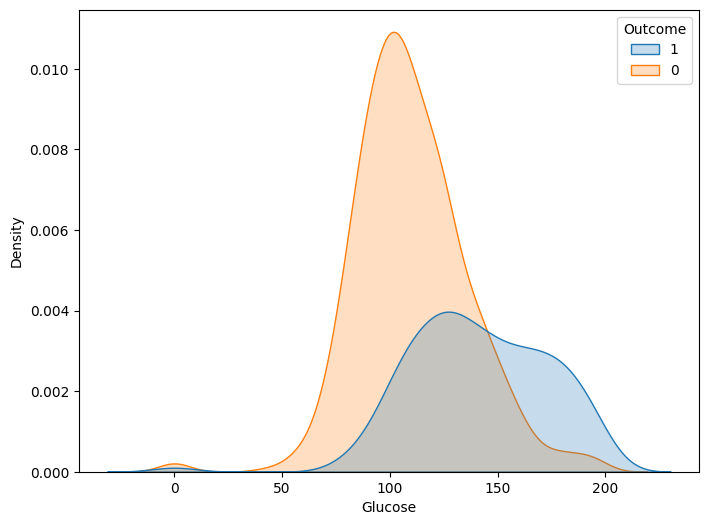

In [36]:
plt.figure(figsize=(8,6))
print(best_feature)
sns.kdeplot(data=df, x=best_feature, hue='Outcome', fill=True)

BloodPressure


<Axes: xlabel='BloodPressure', ylabel='Density'>

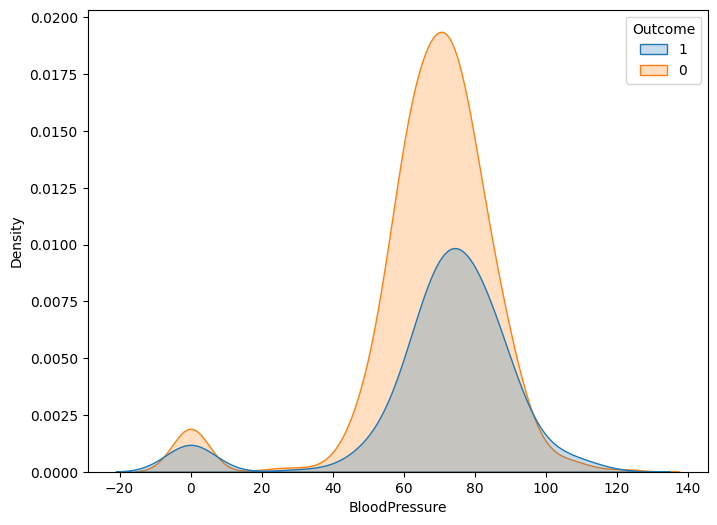

In [9]:
print(worst_feature)
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x=worst_feature, hue='Outcome', fill=True)

In [ ]:
Exercício 2

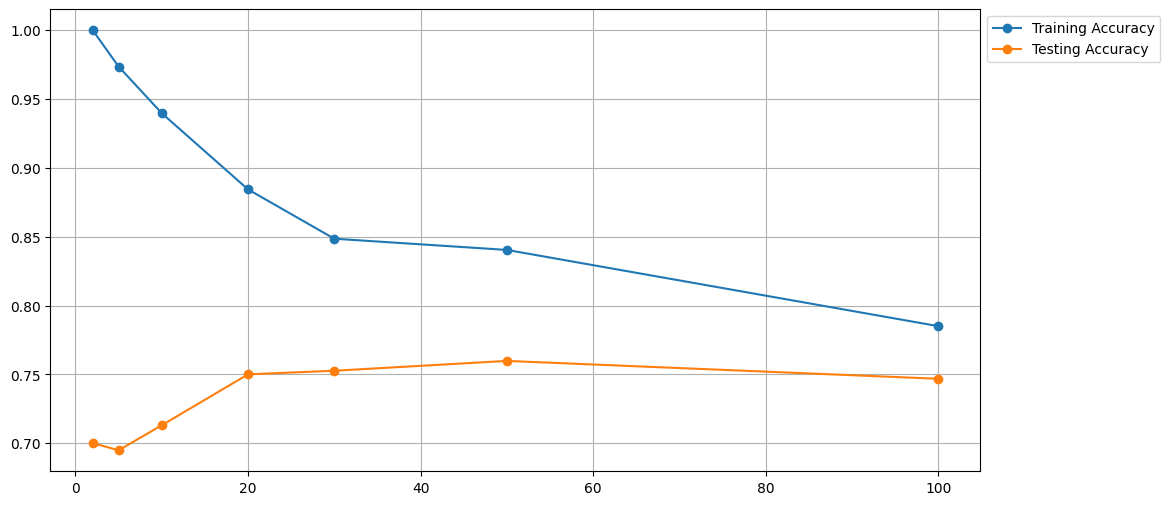

In [38]:
min_spl_param = [2, 5, 10, 20, 30, 50, 100]
accuracy_training = []
accuracy_testing = []
number_of_runs = 10

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1, stratify=y)

for param in min_spl_param:
    model = tree.DecisionTreeClassifier(min_samples_split=param)
    training_accuracy, testing_accuracy = 0, 0
    for run in range(number_of_runs):
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        training_accuracy += metrics.accuracy_score(y_train, y_train_pred) / number_of_runs

        y_test_pred = model.predict(X_test)
        testing_accuracy += metrics.accuracy_score(y_test, y_test_pred) / number_of_runs
        
    accuracy_training.append(training_accuracy)
    accuracy_testing.append(testing_accuracy)

plt.figure(figsize=(12, 6))
plt.plot(min_spl_param, accuracy_training, label='Training Accuracy', marker='o')
plt.plot(min_spl_param, accuracy_testing, label='Testing Accuracy', marker='o')
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [91]:
Exercício 3
Analyzing the graph, we can infer three major takeaways, 
    1. low minimum split sample values produce overfitting; 
    2. median minimum values have the best generalization capacity; 
    3. high minimum split sample values produce overfitting;
1. On low minimum split sample values, such as 2, 5 and 10, we can observe that the training accuracy is near perfect while on the other hand the 
testing accuracy rounds 70%, which represents a relatively low value when compared to the accuracies of median to high split sample values, 
inducing that the classifier adapted to much to the training data, which contain irregularities, thus overfitting.
2. Median minimum split sample values, such as 20, 30 and 50, produced the highest testing accuracy, thus having the best generalization capacity,
across all values. Between these values the value 50, produced the best result rounding 76% testing accuracy. On the same page, the training accuracy 
declined which was expected, due the fact, that with the requirement of a higher minimum sample split, the model wouldn´t adapt so well to the training
data.
3. On high minimum split sample values, such as 100, we can observe that both the training accuracy and the testing accurcy dropped when compared to 
median values. This occured because the model with such high minimum sample split values couldn´t not only adapt but also learn patterns in data, thus
underfitting


SyntaxError: invalid syntax (1154457355.py, line 1)

In [ ]:
Exercício 4

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: object


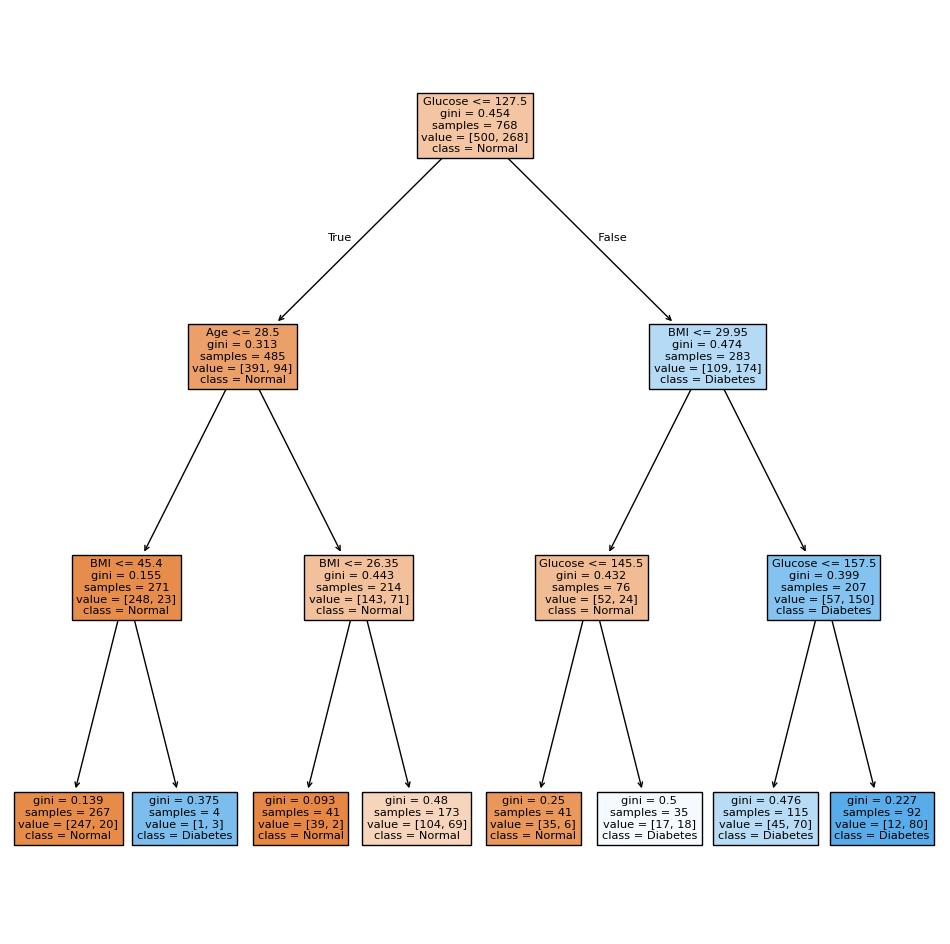

In [24]:
predictor = tree.DecisionTreeClassifier(max_depth=3)
predictor.fit(X, y)
print(y)
plt.figure(figsize=(12,12))
tree.plot_tree(predictor, feature_names=X.columns, class_names=["Normal", "Diabetes"], filled=True)
plt.show()